### Importaciones y lecturas

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from itertools import chain
import shutil
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfAll = pd.read_csv('/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Tablas/dfAll.csv')

df_clientes_malos = pd.read_csv('/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Tablas/df_STATUSm/dfm_clientes_malos.csv')
df_clientes_regulares = pd.read_csv('/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Tablas/df_STATUSm/dfm_clientes_regulares.csv')
df_clientes_vip = pd.read_csv('/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Tablas/df_STATUSm/dfm_clientes_vip.csv')

### Limpieza datos y variables dummy

In [3]:
# Se eliminan duplicados,  STATUS (ver 1_data_cleaning.ipynb ) balance del mes 

dfAll_m = dfAll.drop_duplicates( subset= ['ID'] , keep='first')
dfAll_m = dfAll_m.drop(['Unnamed: 0','STATUS', 'MONTHS_BALANCE'], axis = 1)
dfAll_m.head(3)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.89,12.44,1,1,0,0,NaN,2.0
16,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.89,12.44,1,1,0,0,NaN,2.0
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.83,3.11,1,0,0,0,Security staff,2.0


In [4]:
dfAll_m.columns, dfAll_m.shape

(Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
        'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
        'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'YEARS_BIRTH',
        'YEARS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
        'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
       dtype='object'),
 (36457, 18))

In [5]:
dfAll_m['YEARS_EMPLOYED'].describe(), dfAll_m['YEARS_BIRTH'].describe()

(count    36457.000000
 mean      -162.364823
 std        377.128577
 min      -1000.670000
 25%          1.120000
 50%          4.250000
 75%          8.640000
 max         43.050000
 Name: YEARS_EMPLOYED, dtype: float64,
 count    36457.000000
 mean        43.767611
 std         11.508341
 min         20.520000
 25%         34.140000
 50%         42.640000
 75%         53.250000
 max         68.910000
 Name: YEARS_BIRTH, dtype: float64)

In [6]:
df_clientes_malos.shape , df_clientes_regulares.shape , df_clientes_vip.shape

((1503, 18), (12286, 18), (6909, 18))

In [7]:
df_clientes_malos.head(3)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5018501,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,51.92,2.75,1,1,1,0,Cooking staff,2.0
1,5021431,F,N,Y,0,126000.0,Commercial associate,Higher education,Single / not married,House / apartment,51.80,6.77,1,0,0,0,Sales staff,1.0
2,5038807,M,Y,Y,0,202500.0,Commercial associate,Higher education,Married,House / apartment,34.68,14.72,1,0,0,1,Laborers,2.0


In [8]:
# Se elimina ID en la correlacion para evitar valores incongruentes 

# dfAll_m = dfAll_m.dropna()

df_clientes_malos = df_clientes_malos.drop(['ID'], axis = 1)
df_clientes_regulares = df_clientes_regulares.drop(['ID'], axis = 1)
df_clientes_vip = df_clientes_vip.drop(['ID'], axis = 1)

# Se eliminan valores vacíos en 

df_clientes_malos = df_clientes_malos.dropna()
df_clientes_regulares = df_clientes_regulares.dropna()
df_clientes_vip = df_clientes_vip.dropna()

df_clientes_malos_str = df_clientes_malos
df_clientes_regulares_str = df_clientes_regulares
df_clientes_vip_str = df_clientes_vip

In [9]:
df_clientes_malos.head(3)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,51.92,2.75,1,1,1,0,Cooking staff,2.0
1,F,N,Y,0,126000.0,Commercial associate,Higher education,Single / not married,House / apartment,51.80,6.77,1,0,0,0,Sales staff,1.0
2,M,Y,Y,0,202500.0,Commercial associate,Higher education,Married,House / apartment,34.68,14.72,1,0,0,1,Laborers,2.0


In [10]:
# Se prueban variables dummy

df_clientes_malos = pd.get_dummies(df_clientes_malos)
df_clientes_regulares = pd.get_dummies(df_clientes_regulares)
df_clientes_vip = pd.get_dummies(df_clientes_vip)

### Correlación

In [11]:
# Se hace la primer correlación
# Se eliminan automáticamente valores con string

s_clientes_malos = df_clientes_malos.corr()
s_clientes_regulares = df_clientes_regulares.corr()
s_clientes_vip = df_clientes_vip.corr()

In [12]:
# # Se elimina Flag Mobil por inconsistencia

df_clientes_malos_1 = df_clientes_malos.drop(['FLAG_MOBIL'], axis = 1)
df_clientes_regulares_1 = df_clientes_regulares.drop(['FLAG_MOBIL'], axis = 1)
df_clientes_vip_1 = df_clientes_vip.drop(['FLAG_MOBIL'], axis = 1)

s_clientes_malos_1 = df_clientes_malos_1.corr()
s_clientes_regulares_1 = df_clientes_regulares_1.corr()
s_clientes_vip_1 = df_clientes_vip_1.corr()

In [13]:
s_clientes_malos_1

,CNT_CHILDREN,AMT_INCOME_TOTAL,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
CNT_CHILDREN,1.000000,-0.028398,-0.171065,-0.053053,-0.017742,0.031643,-0.037543,0.909897,-0.013788,0.013788,...,0.004498,-0.011006,-0.037169,-0.039564,-0.030825,-0.029694,0.046062,0.013283,-0.033373,-0.006833
AMT_INCOME_TOTAL,-0.028398,1.000000,0.054478,0.047124,-0.121883,0.013104,0.116681,-0.059520,-0.177007,0.177007,...,-0.062870,-0.059036,0.301424,-0.072569,0.003097,0.029048,-0.089794,-0.044903,-0.036237,-0.062810
YEARS_BIRTH,-0.171065,0.054478,1.000000,0.384225,-0.035565,0.009394,-0.141727,-0.134019,0.081038,-0.081038,...,-0.086201,0.000534,0.094033,0.083482,0.036485,0.044691,-0.092712,-0.052644,0.084137,0.000440
YEARS_EMPLOYED,-0.053053,0.047124,0.384225,1.000000,0.036934,0.046791,-0.065225,-0.026628,0.127510,-0.127510,...,0.009132,-0.027304,0.117515,0.133630,0.021493,0.078683,-0.138834,-0.016975,-0.046770,-0.039429
FLAG_WORK_PHONE,-0.017742,-0.121883,-0.035565,0.036934,1.000000,0.340228,-0.100390,0.008073,-0.013470,0.013470,...,-0.040927,0.042927,0.050293,-0.024460,-0.000907,-0.032972,0.028866,0.050230,-0.004666,0.050230
FLAG_PHONE,0.031643,0.013104,0.009394,0.046791,0.340228,1.000000,0.000475,0.026052,-0.034033,0.034033,...,0.013769,0.016499,0.018582,-0.024244,-0.028188,-0.035521,0.003510,0.003121,-0.026201,-0.016685
FLAG_EMAIL,-0.037543,0.116681,-0.141727,-0.065225,-0.100390,0.000475,1.000000,-0.043853,0.007620,-0.007620,...,-0.003027,-0.009687,0.021472,-0.029945,0.030143,-0.021314,-0.061939,-0.033781,-0.023114,-0.006778
CNT_FAM_MEMBERS,0.909897,-0.059520,-0.134019,-0.026628,0.008073,0.026052,-0.043853,1.000000,-0.026191,0.026191,...,-0.020019,0.012812,-0.001080,-0.062035,-0.036267,-0.012034,0.065849,-0.001866,-0.028045,0.006737
CODE_GENDER_F,-0.013788,-0.177007,0.081038,0.127510,-0.013470,-0.034033,0.007620,-0.026191,1.000000,-1.000000,...,-0.242506,-0.048807,-0.071905,0.171162,0.062933,0.044429,0.196905,0.052042,-0.152792,0.070417
CODE_GENDER_M,0.013788,0.177007,-0.081038,-0.127510,0.013470,0.034033,-0.007620,0.026191,-1.000000,1.000000,...,0.242506,0.048807,0.071905,-0.171162,-0.062933,-0.044429,-0.196905,-0.052042,0.152792,-0.070417


### Gráficas

'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Dummy_2/Clientes_malos_dummy_2.png'

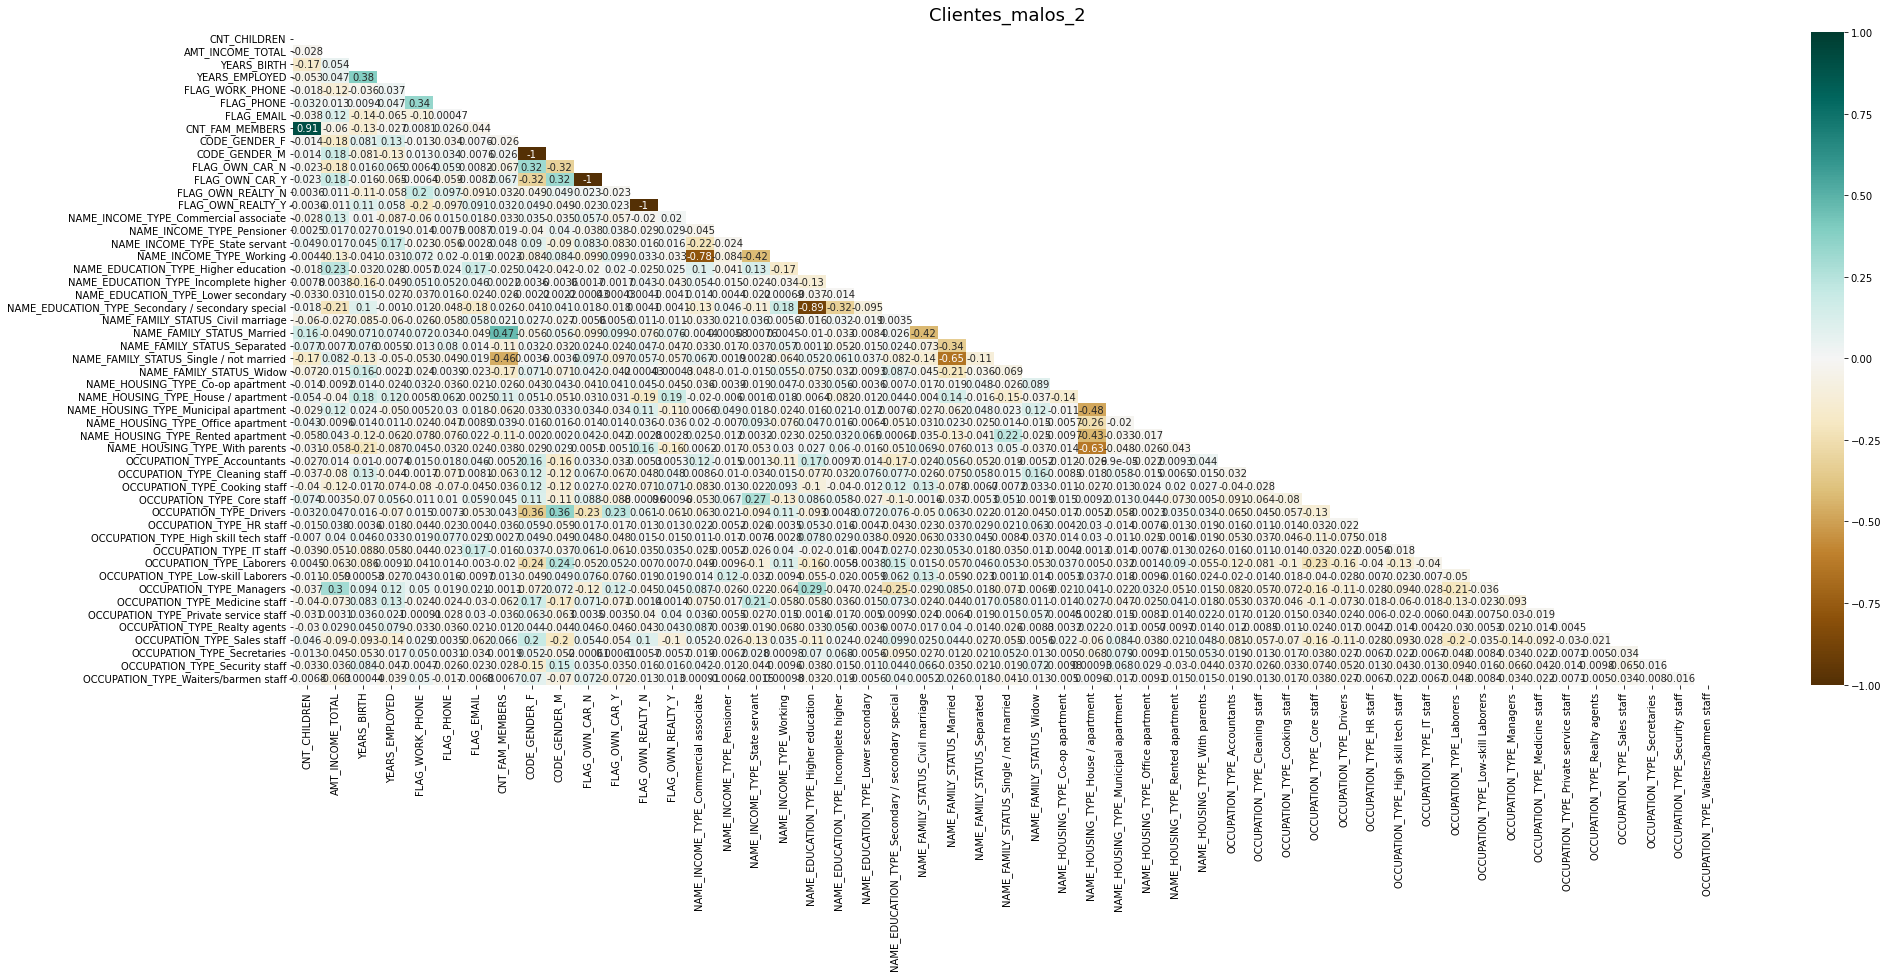

In [14]:
plt.figure(figsize=(32, 12))
mask = np.triu(np.ones_like(s_clientes_malos_1, dtype=bool))
heatmap = sns.heatmap(s_clientes_malos_1, mask= mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Clientes_malos_2', fontdict={'fontsize':18}, pad=12);

plt.savefig('Clientes_malos_dummy_2.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Clientes_malos_dummy_2.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Dummy_2/Clientes_malos_dummy_2.png'
shutil.move(pos1,pos2)

'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Dummy_2/Clientes_VIP_dummy_2.png'

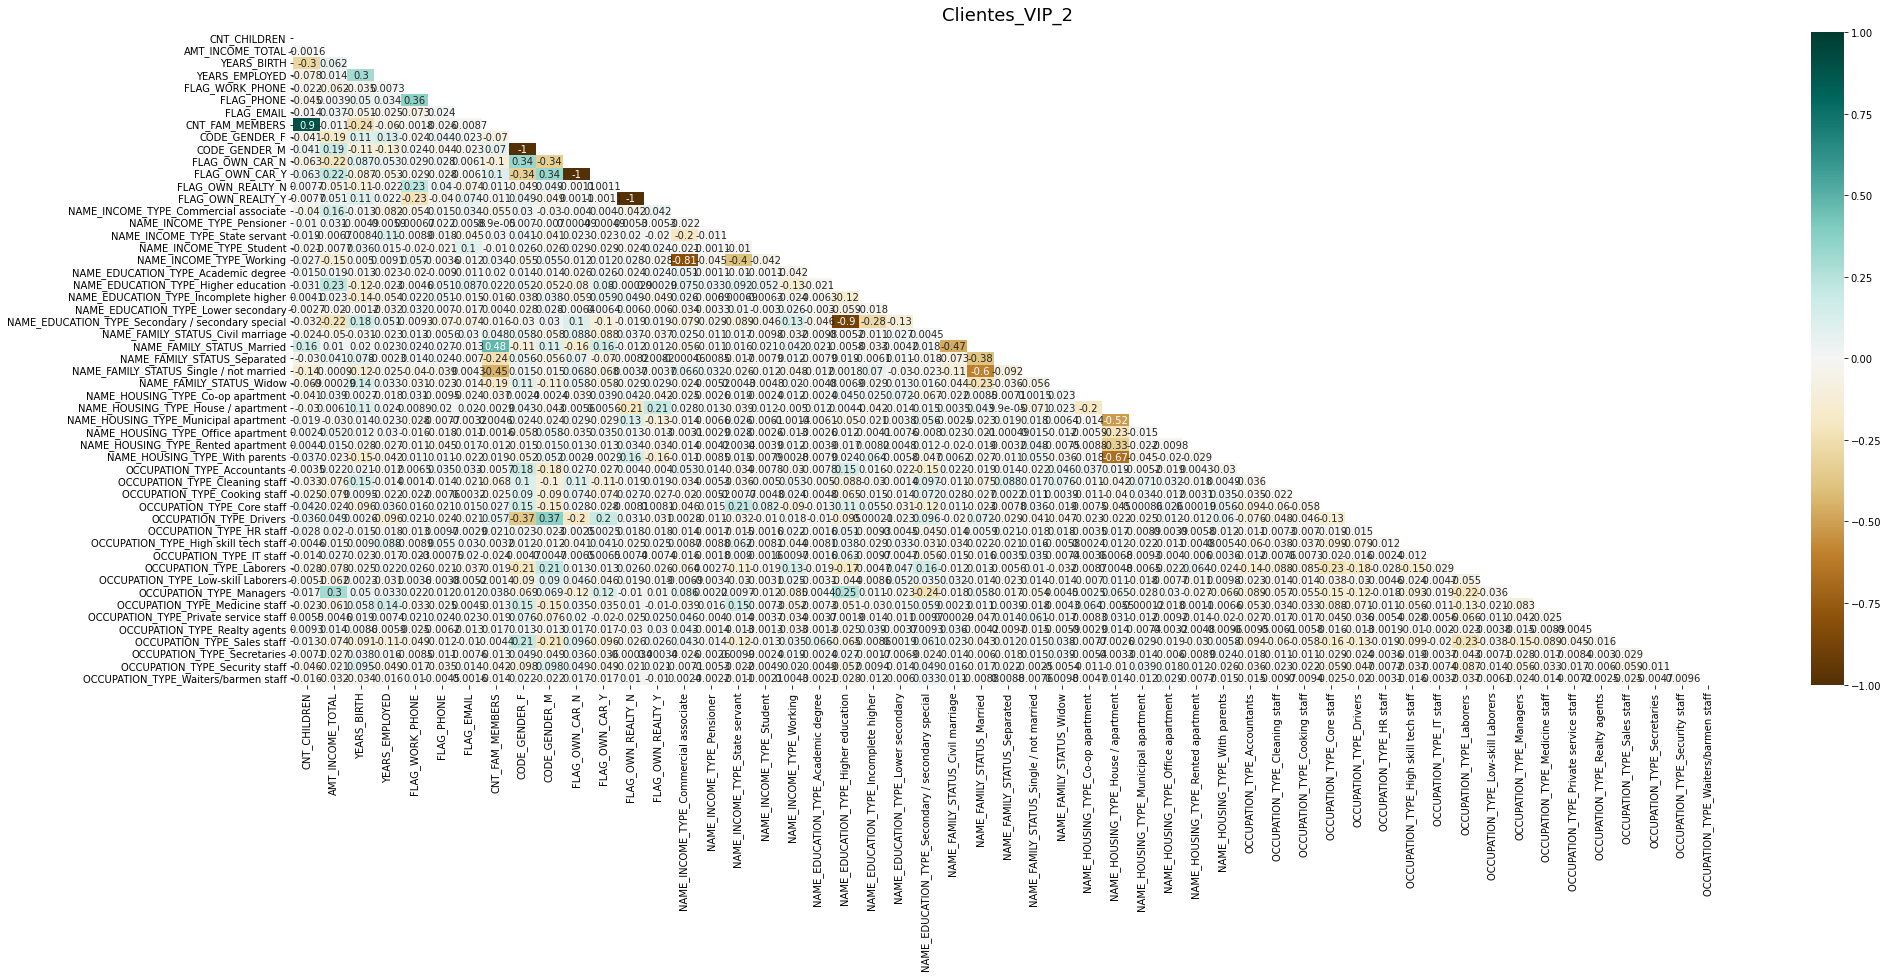

In [15]:
plt.figure(figsize= (32, 12))
mask = np.triu(np.ones_like(s_clientes_vip_1, dtype=bool))
heatmap = sns.heatmap(s_clientes_vip_1, mask= mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Clientes_VIP_2', fontdict={'fontsize':18}, pad=12);

plt.savefig('Clientes_VIP_dummy_2.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Clientes_VIP_dummy_2.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Dummy_2/Clientes_VIP_dummy_2.png'
shutil.move(pos1,pos2)

'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Dummy_2/Clientes_regulares_dummy_2.png'

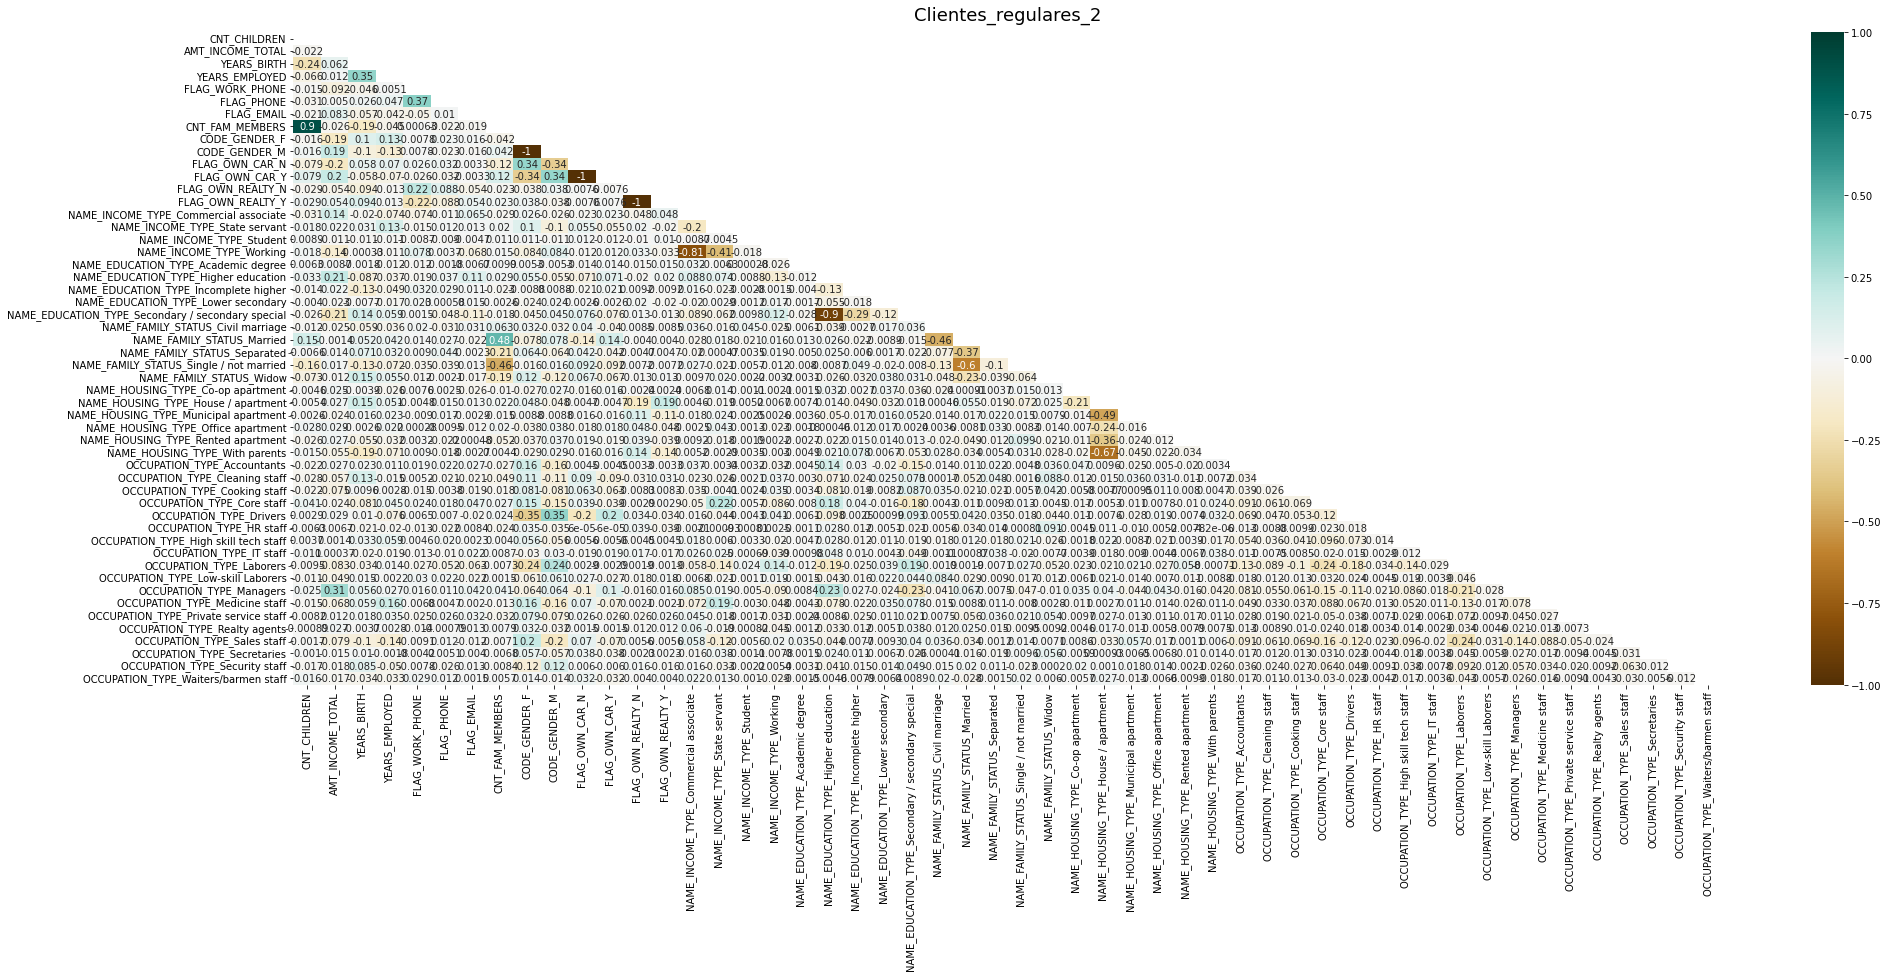

In [16]:
plt.figure(figsize=(32, 12))
mask = np.triu(np.ones_like(s_clientes_regulares_1, dtype=bool))
heatmap = sns.heatmap(s_clientes_regulares_1, mask= mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Clientes_regulares_2', fontdict={'fontsize':18}, pad=12);

plt.savefig('Clientes_regulares_dummy_2.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Clientes_regulares_dummy_2.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Dummy_2/Clientes_regulares_dummy_2.png'
shutil.move(pos1,pos2)


'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Dummy_2/Correlación_AMT_INCOME_TOTAL_VIP_dummy_2.png'

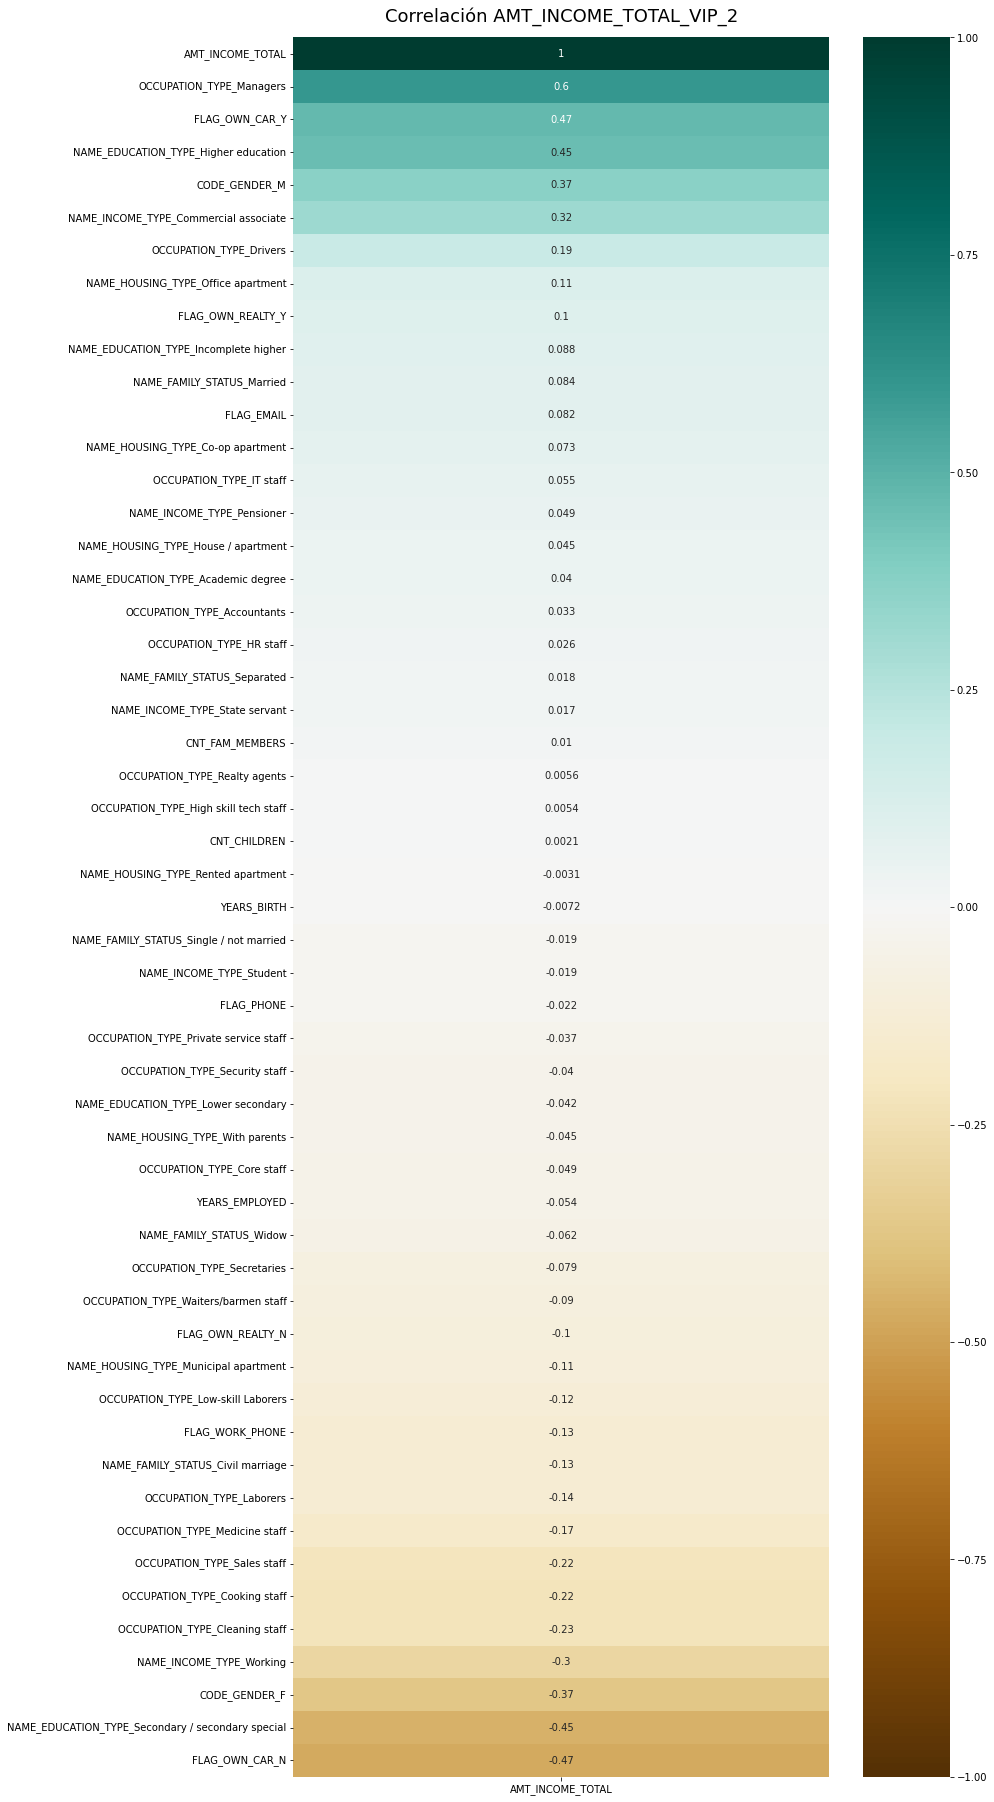

In [17]:
# Correlación por ingresos sin strings

plt.figure(figsize=(12,32))
heatmap = sns.heatmap(s_clientes_vip_1.corr()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación AMT_INCOME_TOTAL_VIP_2', fontdict={'fontsize':18}, pad=16)

plt.savefig('Correlación_AMT_INCOME_TOTAL_VIP_dummy_2.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Correlación_AMT_INCOME_TOTAL_VIP_dummy_2.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Dummy_2/Correlación_AMT_INCOME_TOTAL_VIP_dummy_2.png'
shutil.move(pos1,pos2)

'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Dummy_2/Correlación_AMT_INCOME_TOTAL_malos_dummy_2.png'

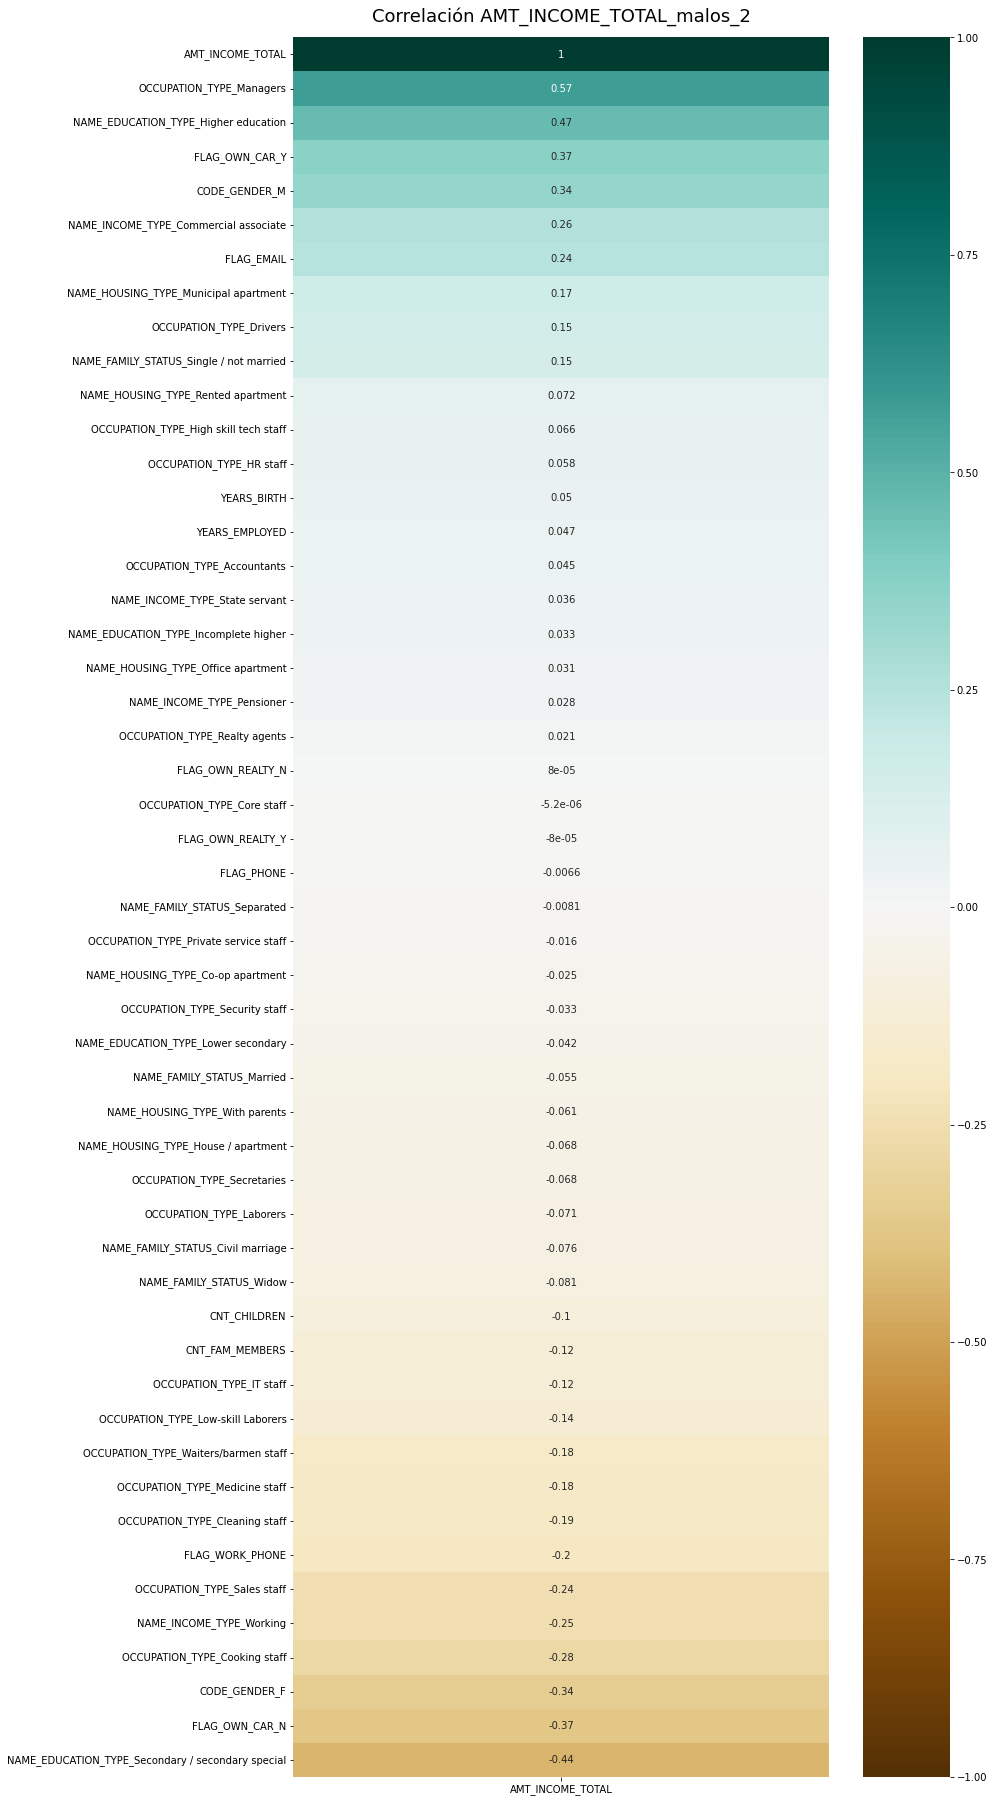

In [18]:
plt.figure(figsize=(12,32))
heatmap = sns.heatmap(s_clientes_malos_1.corr()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación AMT_INCOME_TOTAL_malos_2', fontdict={'fontsize':18}, pad=16);

plt.savefig('Correlación_AMT_INCOME_TOTAL_malos_dummy_2.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Correlación_AMT_INCOME_TOTAL_malos_dummy_2.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Dummy_2/Correlación_AMT_INCOME_TOTAL_malos_dummy_2.png'
shutil.move(pos1,pos2)